# Homework 4

## Question Ideas

- Dimensionality Reduction
    - Data with some _true_ underlying dimensionality, can the students recover the true dimensionality of the data? 
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.decomposition import PCA, NMF

## Question 0. Getting Data

**For this part there is nothing to implement**

However, please review the documentation for [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) and [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to see what these functions do.  Here is more information on the [dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html).


Recall that for dimensionality reduction we form the matrix
$$
{\bf X} = [{\bf x}_1; {\bf x}_2; \ldots; {\bf x}_N] \in \mathbb{R}^{d\times N}
$$
where ${\bf x}_i \in \mathbb{R}^d$ is the dimension of the data and $N$ is the number of training points.  We want to find a **dictionary** matrix ${\bf W}$ and a **code** matrix ${\bf Z}$ such that ${\bf X} \approx {\bf WZ}$.  Dimensionality reduction comes in when we select ${\bf W} \in \mathbb{R}^{d \times q}$ and ${\bf Z} \in \mathbb{R}^{q\times N}$ with $q \ll d$.

In [3]:
# Load in the data.
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

tfidf_vectorizer = TfidfVectorizer(min_df = 30)

# The data matrix X and the targets y.
X = (tfidf_vectorizer.fit_transform(newsgroups_train.data).T).todense()
y = newsgroups_train.target

(d, N) = X.shape
print("X has shape (d, N) = ", X.shape)

# The reduced dimension.
q = 5

X has shape (d, N) =  (1771, 2369)


## Question 1. Training with PCA

### Part (a)
Using the PCA implemented in Sci-Kit learn, obtain the low-dimensional projection of ${\bf X}$ (i.e. get ${\bf W}$ and ${\bf Z}$) for when $q = 5$.  Read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) carefully.  In particular, make sure you are computing the correct ${\bf W}$ and ${\bf Z}$.

In [4]:
pca = PCA(n_components=q)
pca.fit(X.T)
Z = pca.fit_transform(X.T).T
W = pca.components_.T

print("W has shape ", W.shape)
print("Z has shape ", Z.shape)

W has shape  (1771, 5)
Z has shape  (5, 2369)


### Part (b)

The matrix ${\bf Z} = [{\bf z}_1,\ldots,{\bf z}_N]$ is the matrix of the reduced data.  Make a scatter plot of the data projected onto its first two principal components.  In other words, form a scatter plot of all the ${\bf z}_i$ with the first component as the $x$-axis and the second component as the $y$-axis.  Set the color bar so that the points are colored corresponding to their target label ${\bf y}$ (which was defined earlier in the code).

NameError: name 'sns' is not defined

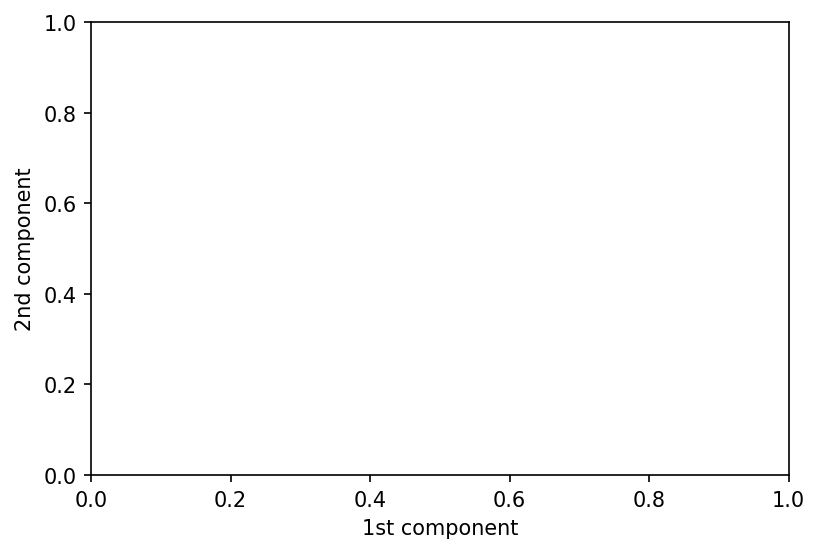

In [6]:
## TO DO STARTS HERE ##

component1= Z[0:1]
component2= Z[1:2]
fig, ax = plt.subplots(dpi=150)
ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
#scatter = ax.scatter(component1, component2, c='blue', cmap='tab10')
#legend1 = ax.legend(*scatter.legend_elements(),
#                    loc='center right', title="", bbox_to_anchor=(1.25, 0.5))
sns.scatterplot(Z[0], Z[1], s = 10, hue = y)
#ax.add_artist(legend1)
plt.show()

## TO DO ENDS HERE ##

# Also print out the first q components.  There is nothing to do for this part.
loadings = W.T
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])

for i in range(q):
    insens_idx = np.argsort(loadings[i])

    print ('COMPONENT ' + str(i + 1))
    print (' '.join([invocab[w_ix] for w_ix in insens_idx[-10:]]) + '\n')

### Part (c)

Recall that for PCA the dictionary and code matrices ${\bf W},{\bf Z}$ can be found using either an eigenvalue decomposition or the SVD.  Suppose the matrix ${\bf X}$ is centered so that 
$$
\frac{1}{N}\sum_{i = 1}^N {\bf x}_i = \vec{0} \in \mathbb{R}^d
$$
The covariance matrix is defined to be ${\bf C} = {\bf XX}^T$.  The eigen-decomposition of ${\bf C} = {\bf W\Sigma W}^T$ gives the matrices ${\bf W}$ and ${\bf Z} = {\bf \Sigma W}^T$.  Here
$$
{\bf \Sigma} = \begin{bmatrix}
\sigma_1^2 & & \\
 & \ddots & \\
 & & \sigma_d^2
\end{bmatrix}
$$
is the diagonal matrix with eigenvalues $\sigma_i^2$.  The proportion of explained variance by our low-dimensional projection is defined to be
$$
\mathrm{PV}(q) := \frac{\sum_{i=1}^q \sigma_i^2}{\sum_{i=1}^d \sigma_i^2}
$$
Make a plot of $\mathrm{PV}(q)$ versus $q$ for $q = 1,\ldots,1000$.  For this you do not need to implement the procedure above on your own, but can instead use the Sci-kit learn PCA.  In particular, look at the `explained_variance_ratio_` attribute.  Make sure that your plot is clear with a title and labeled axes.

In [7]:
import seaborn as sns

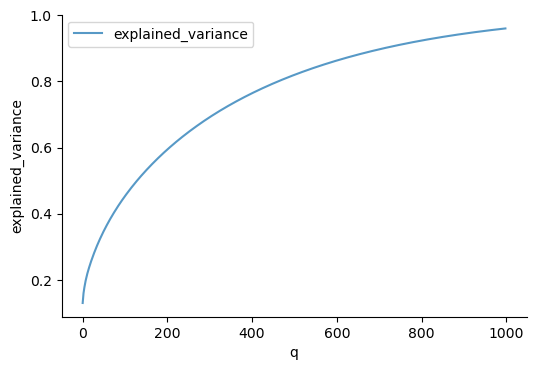

In [8]:
## TO DO STARTS HERE ##
list = []
pca = PCA(X.shape[0])
pca.fit(X)
for i in range(1,1000):
    list.append(sum(pca.explained_variance_ratio_[:i]))
    
def plot_explained_variance():
    fig1=plt.figure(dpi=100)
    plt.plot(list , alpha=0.75, label="explained_variance")
    plt.ylabel("explained_variance")
    plt.xlabel("q")
    sns.despine()
    plt.legend()
    plt.show()
plot_explained_variance()
## TO DO ENDS HERE ##

## Question 2.  Interpreting the principal components

Consider the dataset
$$
{\bf X} = [{\bf x}_1; {\bf x}_2; {\bf x}_3] = \begin{bmatrix}
1 & 2 & 3\\
1 & 2 & 3
\end{bmatrix}
$$
Although this data is 2-dimensional, it actually lives on the 1 dimensional line $x_1 = x_2$.  Without doing any computation, answer the following with short explanations:

1.  What is the first principal component (i.e. first eigenvector)?  

2.  What is the second principal component?

3.  What is the proportion of variance explained by only the first principal component?

4.  What are the matrices ${\bf W}, {\bf Z}$ when $q = 1$?  Normalize the columns of ${\bf W}$ to have unit norm.

1. $\vec{PC_1} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ , the first principle component is the direction that minimizes the distance from the data point to the line the most 

2. $\vec{PC_2} = \begin{bmatrix} -1 \\1 \end{bmatrix}$ ,th second principle componeng is perpendicular to the first component.

3. 1, because the first principle component 100 percent represent the corresponding x1 and x2 value 

4.  ${\bf W} \in \mathbb{R}^{2 \times 1}$ and ${\bf Z} \in \mathbb{R}^{1\times 3}$

$W = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix}$ 

$Z = \begin{bmatrix} -{\sqrt{2}} & 0 &{\sqrt{2}}\end{bmatrix}$ 




**Answer goes here**

## Question 3: Finding True Dimensionality

I generated $N$ observations of $q$ dimensional data according to the following procedure

$$
\begin{align}
z_n &\sim N(0, I_{q})\\
X_n &= Wz_n + \epsilon
\end{align}
$$
where $\epsilon \sim N(d, \sigma^2I_{d})$ and $\epsilon$, $W \in \mathbb{R}^{d \times q}$, and $\mu \in \mathbb{R}^q$ are fixed.

More simply - we have created a simple dataset containing $N$ obersevations of $d=33$ dimensional observations stored in an $N \times d$ array saved as `X.npy`.

Your task is to give your best estimate for $q$, that is, what do you think is the _true_ dimensionality of the data? Then, using your best guess for $q$, report the percent of the variance in $X$ you can explain using just $q$ dimensions.

### Part A: PCA and Cross Validation

Use PCA with Leave-One-Out cross validation to chose a value for $q$. You should use the SciKit-Learn implementation of PCA with the `pca.score` function to compute the log-likelihood of the heldout sample for each validation fold.

Explicitly state your choice of $q$ and generate the PCA embeddings of $X$ in your $q$ dimensional space. What percent of the variability in `X` can you explain with just `q` dimensions?

In [10]:
data = np.load("./x.npy")

In [11]:
print(data.shape)

(500, 33)


In [12]:
import sklearn.model_selection

In [13]:
dim = np.arange(1,34)
cv =  sklearn.model_selection.LeaveOneOut()
err=np.zeros(33)
for ll, dims in enumerate(dim):
#    print(dims)
    for train_ix, test_ix in cv.split(data):
        data_train, data_test = data[train_ix], data[test_ix]
        pca = PCA(n_components=dims)
        pca.fit(data_train)
        nll=-pca.score(data_test)
        err[ll] += nll
#    print(err[ll])        
# calculate accuracy

In [14]:
print(err.argmin()+1)
err.min()

3


58949.94918049989

I choose number of PCA to be 3.

In [15]:
pca = PCA(n_components=3)
embeds=pca.fit_transform(data)
print(sum(pca.explained_variance_ratio_))

0.3277436957145081


32.77436957145081% of the variability can be explained by with 3 dimension 

### Part B: K-Means

Now that you have your PCA embeddings in a $q$ dimensional space, choose an appropriate number of clusters and implement k-means to form predictions. 


Once you have clustered the data produce a scatter-plot of the clusters in the first two dimesions of your embeddings where the color of the points represents the cluster assignment. On this plot also include the cluster centers generated by k-means.

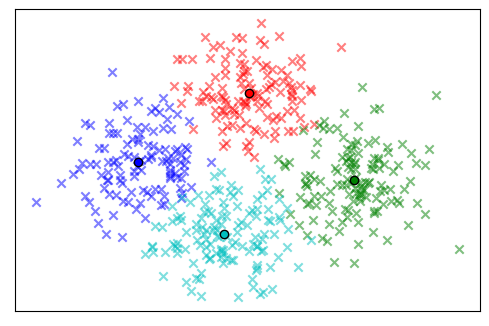

Done at iteration 5


In [26]:
'''
    X: data points, n_samples x dim
    C: cluster centers, n_samples x dim
    Z: cluster assignments, n_samples
    K: # of centers
'''
def expectation(X, C):
    return np.sum((X[:, np.newaxis, :] - C)**2, axis=-1).argmin(axis=-1)

def plot_data(X, Z=None, C=None):

    plt.figure(dpi=100)
    if Z is None:
        plt.scatter(X[:, 0], X[:, 1], c='m', marker='x', alpha=0.5)
        if C is not None:
            plt.scatter(C[:, 0], C[:, 1], c='b', marker='o', edgecolor='k')
    else:
        colors = ['r', 'g', 'b', 'c', 'y']

        for k in range(C.shape[0]):
            plt.scatter(X[Z == k, 0], X[Z == k, 1], c=colors[k], marker='x', alpha=0.5)
            plt.scatter(C[k, 0], C[k, 1], c=colors[k], marker='o', edgecolor='k')


    plt.xticks([])
    plt.yticks([])
    plt.show()

def maximization(X, Z, K):

    C_new = np.zeros((K, X.shape[-1]))
    for k in range(K):
        C_new[k, :] = np.mean(X[Z == k, :], axis=0)
    return C_new

data= embeds
K = 4
C = np.random.RandomState(36).randn(K, data.shape[-1])*2.5
max_iter = 30
eps = 1e-5

Z_prev = expectation(data, C)
C_prev = np.copy(C)

for i in range(max_iter):
    Z = expectation(data, C)
    C = maximization(data, Z, K)
    if ((Z_prev - Z) **2).sum() < eps and ((C_prev - C) ** 2).sum() < eps:
        plot_data(data, Z, C)
        print('Done at iteration', i)
        break
    
    
    Z_prev = np.copy(Z)
    C_prev = np.copy(C)

## Question 4: Evidence Lower Bound

For a given joint probability distribution $p(\mathbf{X},\mathbf{Z}\mid\theta)$ of the data $\mathbf{X}$ and underlying latent variables $\mathbf{Z}$, parametrized by some parameters $\theta$ show that we can decompose the marginal likelihood of data as

$$
\log{p(\mathbf{X}\mid\theta)} = \underbrace{\mathbb{E}_q[\log{p(\mathbf{X},\mathbf{Z}\mid\theta)} - \log{q(\mathbf{Z})}]}_{\mathcal{L}(q,\theta)} + \mathrm{KL}(q(\mathbf{Z}) \mid\mid  p(\mathbf{Z}\mid\mathbf{X},\theta))
$$

where $q(\mathbf{Z})$ is an approximation of the true posterior $p(\mathbf{Z}\mid\mathbf{X},\theta)$. Therefore, argue why $\mathcal{L}(q,\theta)$ is a lower bound on the $\log$-marginal likelihood of the data. When will $\mathcal{L}(q,\theta)$ equal $\log{\mathbf{p(\mathbf{X}\mid\theta)}}$?


$\mathrm{KL}(q(\mathbf{Z}) \mid\mid  p(\mathbf{Z}\mid\mathbf{X},\theta))$measures the difference between the estimated posterior distribution of Z and probability of Z given X and $\theta$, and since KL divergence is always positive $ {\mathcal{L}(q,\theta)}$$\leq \log{p(\mathbf{X}\mid\theta)}$. $\mathcal{L}(q,\theta)$ is a lower bound on the $\log$-marginal likelihood of the data.

When $\mathrm{KL}(q(\mathbf{Z}) \mid\mid  p(\mathbf{Z}\mid\mathbf{X},\theta))=0$, which is  $ q(\mathbf{Z}) = p(\mathbf{Z}\mid\mathbf{X},\theta)$,$\mathcal{L}(q,\theta)$ equal $\log{\mathbf{p(\mathbf{X}\mid\theta)}}$ and $\mathcal{L}(q,\theta)$ is maximized.



## Question 5: EM guarantees likelihood increase

In general, the EM algorithm can be viewed through the lens of Evidence Lower Bound derived above. For a given value of parameters after the $t^{\mathrm{th}}$ iteration, $\theta_{t}$, the EM cycle can be described as:

**E step:**
$$
q_{t+1}(\mathbf{Z}) = \arg\max_{q} \mathcal{L}(q,\theta_t)
$$

**M step:**
$$
\theta_{t+1} = \arg\max_{\theta} \mathcal{L}(q_{t+1},\theta)
$$

With this view, argue that the EM algorithm always increases (or stays the same at an optimum) the $\log$ likelihood of data $\log{p(\mathbf{X} | \theta)}$ with each EM cycle. Does EM converge to the global optimum?

**Answer Here**

In the E Step, we maximize over the distribution of Z, which equals to minimizing the KL divergence to when it is 0

In the M step,  we maximize over $\theta$, 

$\mathcal{L}(q,\theta)= \mathbb{E}_q[\log{p(\mathbf{X},\mathbf{Z}\mid\theta)} - \log{q(\mathbf{Z})}]$ since we keep $q(\mathbf{Z})$ is fixed, the log likelihood of joint distributinon $\log{p(\mathbf{X},\mathbf{Z}\mid\theta_{t+1}) }$ will increase after we adjust the $\theta $ to better fit the data

and this will cause lower bound,$\mathcal{L}(q,\theta_{t+1})$, to increase which subsequently cause the log likelihood of data to increase, and $\mathrm{KL}(q(\mathbf{Z}) \mid\mid  p(\mathbf{Z}\mid\mathbf{X},\theta_{t+1}))$ will no longer be zero with new $\theta$,  so the increase in log likelihood will be greater than the lower bound.

EM does not necessarily converge to the global optimum, but it is garanteed to converge to local optimum.